[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ramg-vcs/quinoa-deep-learning/blob/main/Ejemplos-iniciales/1-Reconocimiento-digitos.ipynb)



##1. Reconocimiento de dígitos

Este cuaderno contiene un ejemplo básico de entrenamiento de una red neuronal para el reconocimiento de dígitos escritos a mano, utilizando la base de datos [MNIST](http://yann.lecun.com/exdb/mnist/).

En el ejemplo se abordan los siguientes pasos:
- 1.1. Cargar el conjunto de datos
- 

El proceso se realiza con Keras sobre TensorFlow, por lo cual empezaremos cargando esta última biblioteca:

In [ ]:
import tensorflow as tf

###1.1. Cargar el conjunto de datos

>La base de datos MNIST contiene 70.000 imágenes de dígitos escritos a mano, con sus respectivas etiquetas. De estas imágenes, se usan 60.000 en el entrenamiento de la red neuronal y las 10.000 restantes se reservan para las pruebas.
>
>Utilizaremos cuatro arreglos de NumPy para almacenar el conjunto de datos. Los primeros dos para las imágenes y las etiquetas de entrenamiento:
- ```train_images```
- ```train_labels```
>
>Y dos más para las imágenes y las etiquetas de prueba:
- ```test_images``` 
- ```test_labels```
>
>El siguiente código permite cargar el conjunto de datos en los cuatro arreglos:

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

>Antes de continuar con el proceso es importante familiarizarse con el conjunto de datos. Revisemos primero las características de las imágenes de entrenamiento, contenidas en el arreglo ```train_images```:

In [ ]:
print("Número de ejes:", train_images.ndim)
print("Forma:", train_images.shape)
print("Tipo de datos:", train_images.dtype)

Número de ejes: 3
Forma: (60000, 28, 28)
Tipo de datos: uint8


>De acuerdo con estos resultados ```train_images``` es un vector con $60.000$ matrices $28 \times28 $ de números enteros de $8$ bits sin signo. Por lo tanto:
>- Cada imagen está representada por una matriz.
>- Las imágenes son de 28x28 pixeles.
>- Cada pixel tiene asociado un número entero en el intervalo $[0, 255]$
>
>Observemos la imagen número 5.000, ¿reconoces el dígito? Aprovecha además para confirmar que la imagen es de 28x28 pixeles.

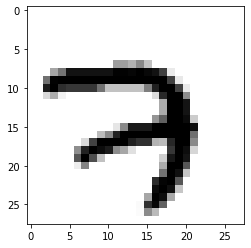

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_images[5000], cmap=plt.cm.binary)

>Revisemos ahora las características de las etiquetas de entrenamiento, contenidas en el arreglo ```train_labels```:

In [ ]:
print("Número de ejes:", train_labels.ndim)
print("Forma:", train_labels.shape)
print("Tipo de datos:", train_labels.dtype)

Número de ejes: 1
Forma: (60000,)
Tipo de datos: uint8


>¿Esperabas estos resultados? Se trata de un vector de $60.000$ elementos. Cada elemento es un número entero de $8$ bits sin signo.
>
>Sabemos que con este vector se etiquetan las imágenes de dígitos escritos a mano, de modo que sus elementos pertenecen al conjunto $\{0, 1, 2, 3, 4, 5, 6, 7, 8, 9\}$.
>
>Comprobemos la etiqueta asociada a la imagen que visualizamos hace un momento, la número 5.000; esperamos que sea un 7:

In [ ]:
print("La imagen 5.000 corresponde al número", train_labels[5000])

La imagen 5.000 corresponde al número 7


---

**Practica.** Ya inspeccionamos las principales características de las imágenes y las etiquetas del conjunto de datos de entrenamiento. De manera particular, vimos que la imagen número 5.000, y también su etiqueta, corresponde al dígito 7. Dedica algunos minutos para modificar el código y observar otros datos, **¿cuál es el primer dígito del conjunto? ¿y el último? ¿Puedes encontrar un 3?**

---

>Finalmente, es importante indicar cómo se obtiene la representación matricial de la imagen y, de paso, se confirma que cada pixel está codificado con un número entero en el intervalo $[0, 255]$. 
>
>Para lo anterior, se escribe la siguiente línea que imprime la mitad izquierda de la matriz asociada a la imagen con que hemos estado trabajando, la número 5.000. Compara esta representación matricial con la imagen, es clara la relación entre el valor del elemento en la matriz y el tono del pixel en la imagen.

In [ ]:
print(train_images[5000, :, :14])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  97  96  77]
 [  0   0   0  90 138 235 235 235 235 235 235 251 251 248]
 [  0   0 140 251 254 254 254 254 254 254 254 254 254 254]
 [  0   0 226 254 208 199 199 199 199 139  61  61  61  61]
 [  0   0  38  82  13   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  25 117 228]
 [  0   0   0   0   0   0   0   0   0  68 119 220 254 25

---

**Ejercicio 1.** Confirma que la imagen número **100** del conjunto de prueba corresponde a un **6**. Revisa tanto la imagen, contenida en ```test_images```, como su etiqueta, en ```test_labels```.

---

###Créditos

Este cuaderno hace parte del proyecto **Quinoa Deep Learning**, una iniciativa del Semillero de investigación Quinoa.